In [38]:
import numpy as np
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    nerve,
)
from sklearn.cluster import DBSCAN
# from sklearn.decomposition import PCA
from sklearn.datasets import make_circles
from trivial_clusterer import trivial_clusterer

import plotly.graph_objects as go

### Mapper graph of a circle dataset with trivial clustering.

In [3]:
data,_ = make_circles(5000)

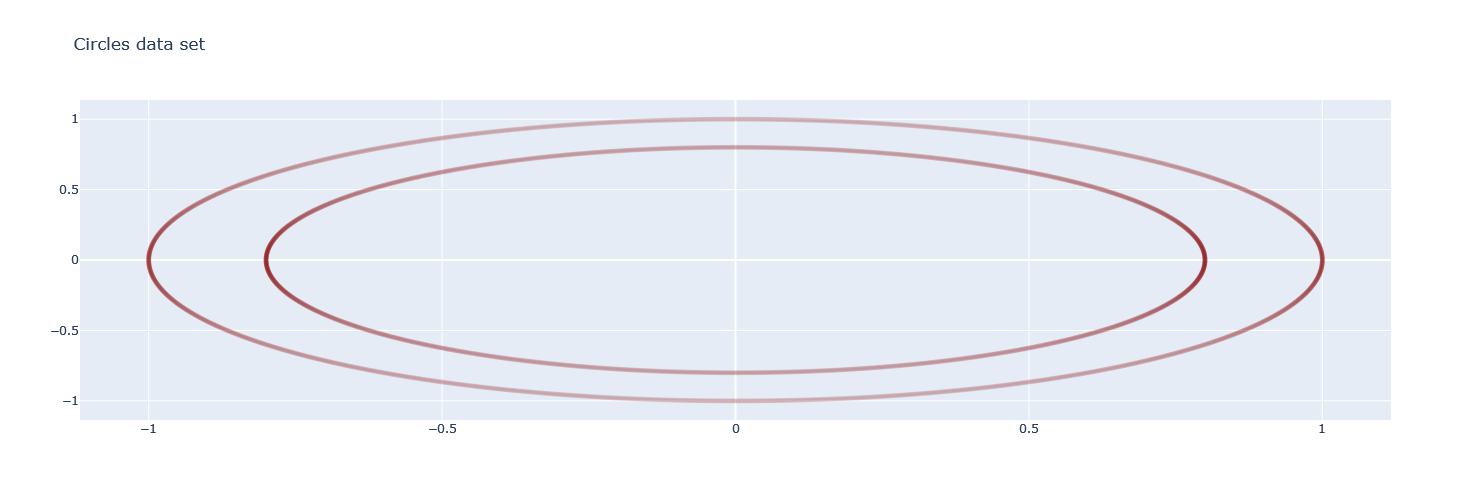

In [19]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=data[:,0], y=data[:,1], name = 'Circles', mode='markers',
              marker=dict(size=5, opacity=0.1, color='maroon'))
)
fig.update_layout(title='Circles data set', width=1000,height=500)
fig.show()

### Mapper Pipeline

The mapper pipeline with the following parameters:
1. Filter function :: `Projection` to x-axis.
2. Cover :: uniform intervals (default params `n_intervals=10` and `overlap_frac=0.1`)
3. Clusterer :: Trivial clustering with `trivial_clusterer`

In [32]:
pipe = make_mapper_pipeline(
    filter_func = Projection(columns = [0]),
    cover = CubicalCover(),
    clusterer = trivial_clusterer(),
    verbose = True,
    store_edge_elements = True,
)

In [33]:
graph = pipe.fit_transform(data)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s


In [34]:
'We can check that each pullback set only has one cluster'
for v in graph.vs:
    print(v['pullback_set_label'], v['partial_cluster_label'])

7 1
8 1
5 1
4 1
0 1
1 1
3 1
9 1
6 1
2 1


[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s


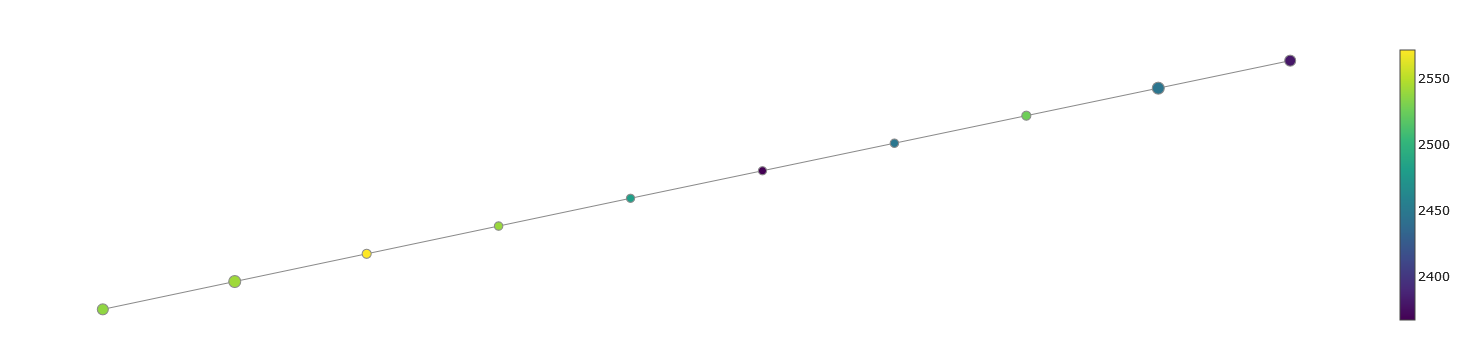

In [35]:
graph = plot_static_mapper_graph(pipe, data)
graph.show()

### New Pipeline with DBSCAN
We see that with trivial clustering our circular data set does not have a mapper graph with a loop. This is intended with trivial clustering as the pullback set of the cover is only clustered to be one vertex.

In [39]:
other_pipe = make_mapper_pipeline(
    filter_func = Projection(columns = [0]),
    cover = CubicalCover(),
    clusterer = DBSCAN(),
    verbose = True,
    store_edge_elements = True,
)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s


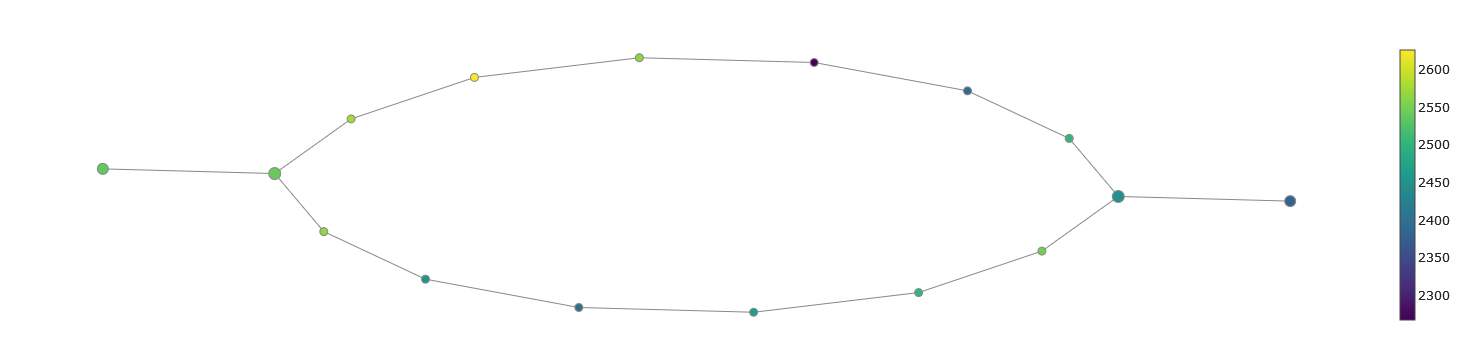

In [40]:
other_graph = plot_static_mapper_graph(other_pipe, data)
other_graph.show()